## Memory - Performance
```
Measure how longer it takes to make a copy of a bigger DataFrame
(1 .. 128 mln rows)
Needs 16GB or RAM to run on my Mac
Updated April 2020
```

In [1]:
import sys, os, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# import our utilities
from util_jupyter import *
from util_models import *
from mybag import *

In [2]:
def print_dt():
    dt_str = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(dt_str)

In [3]:
%%time
# ------------------------------------------------
# Create eight DataFrames with 3 columns 
# and 1,2,4,... 128 Million rows
# store them in bag as bag.df_1 , ... , bag.df_128
# ~ 20 sec on my Mac
# ------------------------------------------------
print_dt()
bag = MyBunch()
qt = 10**6 # million
for ii in [1,2,4,8,16,32,64,128]: # ,256,512,1024]:
    N = qt*ii
    print("Creating DF with %s rows" % commify(N))
    f1 = np.random.normal(loc=2.5,scale=1.0, size=N)
    bag["df_%d"%ii] = pd.DataFrame({'F1':f1, 'F2':f1*2.0, 'F3':f1*3.0})
print(bag)

2022-07-09 22:20:17
Creating DF with 1,000,000 rows
Creating DF with 2,000,000 rows
Creating DF with 4,000,000 rows
Creating DF with 8,000,000 rows
Creating DF with 16,000,000 rows
Creating DF with 32,000,000 rows
Creating DF with 64,000,000 rows
Creating DF with 128,000,000 rows

df_1   = (df - 1000000 rows)
df_128 = (df - 128000000 rows)
df_16  = (df - 16000000 rows)
df_2   = (df - 2000000 rows)
df_32  = (df - 32000000 rows)
df_4   = (df - 4000000 rows)
df_64  = (df - 64000000 rows)
df_8   = (df - 8000000 rows)

CPU times: user 7.63 s, sys: 3.24 s, total: 10.9 s
Wall time: 12.2 s


In [4]:
%%time
# ------------------------------------------------
# measuring time to make a copy of the dataframe
# storing data into array metrics [(n_rows, sec), ...]
# ~ 17 sec on my Mac
# ------------------------------------------------
print_dt()
metrics = []
for dfname in bag.keys():
    n_rows = dfname.split("_")[1]
    t1 = time.time()
    df = bag[dfname].copy()
    df["cc"] = df['F1']*2.0
    del df
    dt = time.time() - t1
    print(f"{dfname:6s} : {dt:>7.3f} sec")
    metrics.append((n_rows,dt))

2022-07-09 22:20:39
df_1   :   0.024 sec
df_2   :   0.034 sec
df_4   :   0.048 sec
df_8   :   0.093 sec
df_16  :   0.184 sec
df_32  :   0.489 sec
df_64  :   1.857 sec
df_128 :   5.000 sec
CPU times: user 1.48 s, sys: 4.14 s, total: 5.62 s
Wall time: 7.73 s


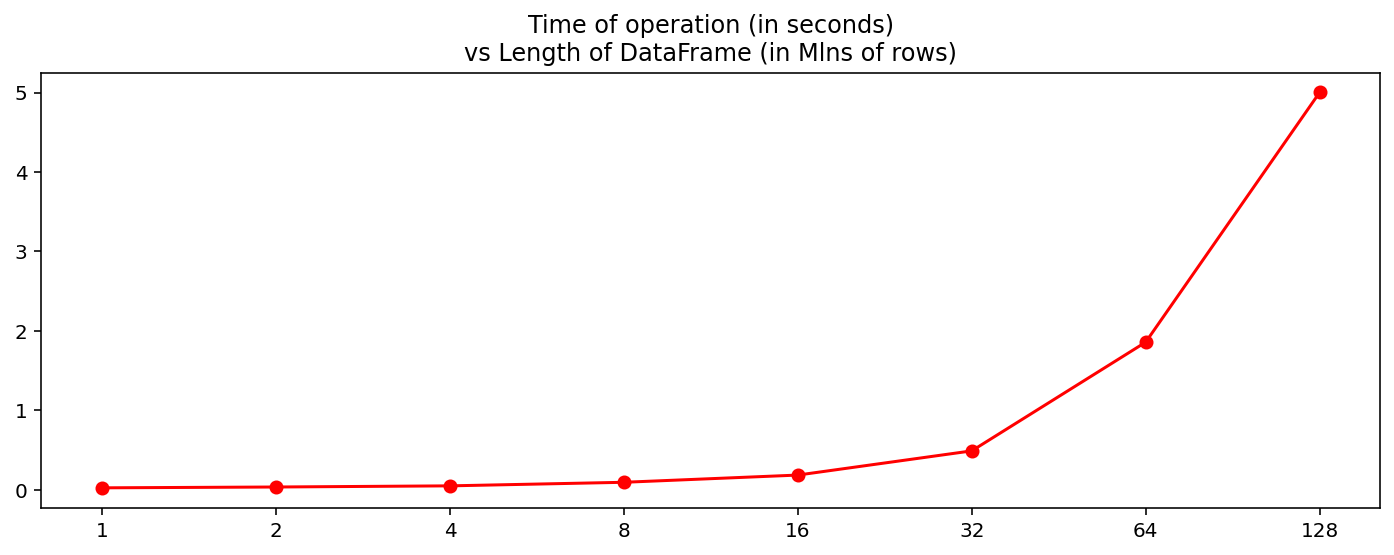

In [5]:
x = []
y = []
for ii in range(len(metrics)):
    xx,yy = metrics[ii]
    x.append(xx)
    y.append(yy)
plt.rcParams["figure.figsize"] = (12, 4) # (width, height)
fig, (ax1) = plt.subplots(nrows=1, ncols=1)
#ax1.set_yscale("log")
_ = ax1.plot(x[:],y[:],'ro-')
_ = ax1.set_title('Time of operation (in seconds)\nvs Length of DataFrame (in Mlns of rows)')
plt.show();